# Code for our inital pre-processing of data

#### Mount the google drive to read the files
- *(Data was stored and used from my google drive)*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
from bs4 import BeautifulSoup
import pickle
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
import pickle

with open ('/content/drive/My Drive/Colab Notebooks/hamfile', 'rb') as fp:
    ham_list = pickle.load(fp)
df_ham = pd.DataFrame(ham_list, columns=['type', 'header', 'body'])

In [0]:
with open ('/content/drive/My Drive/Colab Notebooks/2019spamfile', 'rb') as fp:
    spam_list = pickle.load(fp)
df_spam = pd.DataFrame(spam_list, columns=['type', 'header', 'body'])

Use below if creating the train set for the real-life scenario with the old emails. If not use above

In [0]:
with open ('/content/drive/My Drive/Colab Notebooks/oldspamfile', 'rb') as fp:
    spam_list = pickle.load(fp)
df_spam = pd.DataFrame(spam_list, columns=['type', 'header', 'body'])

In [0]:
# add these two dataframes together and shuffle them
df = df_ham.append(df_spam, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df.head()

,type,header,body
0,spam,Return-Path: <bounce@saviola.ga>\nDelivered-To...,"Content-Type: text/html; charset=""UTF-8""\nDate..."
1,ham,Message-ID: <9044275.1075854180778.JavaMail.ev...,\n\nAttached is the August 2000 nomination for...
2,ham,Message-ID: <24300278.1075856614950.JavaMail.e...,"\n\nVasant,\n\nThanks for the invitation. It w..."
3,ham,Message-ID: <18058176.1075856575244.JavaMail.e...,"\n\nRachel, can you give us a delivery date o..."
4,spam,Return-Path: <test@mobileshopegypt.com>\nDeliv...,"\n<HTML><HEAD></HEAD>\n<BODY>\n<P>Greetings,</..."


In [8]:
print(df.body[10])



Note:  With Dynegy as anchor, NGPL is planning on building a lateral into St. 
Louis for the first time.  MRT (a Reliant pipeline)
has been the only pipeline into this market.  


NGPL Plans Lateral to Serve Illinois Power in St. Louis

Natural Gas Pipeline Company of America (NGPL) announced plans to build a new 
47-mile, 24-inch diameter pipeline lateral into St. Louis to serve Illinois 
Power's gas distribution system. The $35 million project, which is anchored 
by a contract with Illinois Power affiliate Dynegy Marketing and Trade, will 
add at least 300,000 Dth/d of gas transportation capacity to the St. Louis 
market. 

"The pipeline project and related agreements ideally demonstrate our ongoing 
strategy to expand our natural gas pipeline services into growing markets 
currently not connected to NGPL and to increase throughput on our system by 
adding electric load to our extensive pipeline network," said Richard D. 
Kinder, CEO of Kinder Morgan Inc., the parent company of NGP

##### number of words

In [9]:
df = df[pd.notnull(df['type'])]
print(df['body'].apply(lambda x: len(x.split(' '))).sum())

27617517


### The split of the two classes

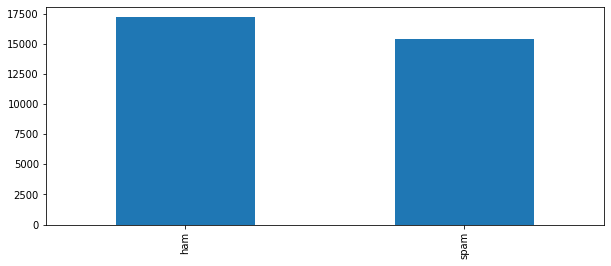

In [0]:
my_types = ['spam', 'ham']
plt.figure(figsize=(10,4))
df['type'].value_counts().plot(kind='bar');

In [0]:
df['type'].value_counts()

ham     17187
spam    15428
Name: type, dtype: int64

## Pre-processing

- HTML decoding
- Lemmatization
- removing stop words
- convert text to lower case
- remove punctuation and bad characters 

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\n\r\t\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

def clean_up_text(text):

    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BeautifulSoup(text, "html.parser").text # HTML decoding
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    
    # Lemmatization
    word_list = nltk.word_tokenize(text) # Tokenize: Split the sentence into words
    lemmatizer = WordNetLemmatizer()
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list]) # Lemmatize list of words and join
    text = lemmatized_output

    return text
    
df['body'] = df['body'].apply(clean_up_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
print(df.body[10])

note dynegy anchor ngpl planning building lateral st louis first time mrt reliant pipeline pipeline market ngpl plan lateral serve illinois power st louis natural gas pipeline company america ngpl announced plan build new 47mile 24inch diameter pipeline lateral st louis serve illinois power gas distribution system 35 million project anchored contract illinois power affiliate dynegy marketing trade add least 300 000 dth gas transportation capacity st louis market pipeline project related agreement ideally demonstrate ongoing strategy expand natural gas pipeline service growing market currently connected ngpl increase throughput system adding electric load extensive pipeline network said richard kinder ceo kinder morgan inc parent company ngpl new lateral extend centralia il point illinois power gas distribution system east st louis market project scheduled completion june 2002 ngpl dynegy entered number longterm gas transportation storage contract including 10year agreement effective ju

#### Save in drive for later use

In [0]:
df.to_pickle('/content/drive/My Drive/Colab Notebooks/ham_2019spam_cleaned_df') 

# use below if using this to obtain data of old emails for the real-life scenario
# df.to_pickle('/content/drive/My Drive/Colab Notebooks/ham_old_spam_cleaned_df') 